In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import sklearn.metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
# dft=pd.read_csv('~/Downloads/home-credit-default-risk/application_test.csv')
dftr=pd.read_csv('~/Downloads/home-credit-default-risk/application_train.csv')
dfbb=pd.read_csv('~/Downloads/home-credit-default-risk/bureau_balance.csv')
dfb=pd.read_csv('~/Downloads/home-credit-default-risk/bureau.csv')
# dfccb=pd.read_csv('~/Downloads/home-credit-default-risk/credit_card_balance.csv')
# dfip=pd.read_csv('~/Downloads/home-credit-default-risk/installments_payments.csv')
dfpc=pd.read_csv('~/Downloads/home-credit-default-risk/POS_CASH_balance.csv')
dfpa=pd.read_csv('~/Downloads/home-credit-default-risk/previous_application.csv')
# dfss=pd.read_csv('~/Downloads/home-credit-default-risk/sample_submission.csv')

In [4]:
dfb.head(10)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.00,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.00,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.0,0,180000.00,71017.38,108982.62,0.0,Credit card,-31,NaN
6,215354,5714468,Active,currency 1,-43,0,79.0,NaN,0.0,0,42103.80,42103.80,0.00,0.0,Consumer credit,-22,NaN
7,162297,5714469,Closed,currency 1,-1896,0,-1684.0,-1710.0,14985.0,0,76878.45,0.00,0.00,0.0,Consumer credit,-1710,NaN
8,162297,5714470,Closed,currency 1,-1146,0,-811.0,-840.0,0.0,0,103007.70,0.00,0.00,0.0,Consumer credit,-840,NaN
9,162297,5714471,Active,currency 1,-1146,0,-484.0,NaN,0.0,0,4500.00,0.00,0.00,0.0,Credit card,-690,NaN


<AxesSubplot:>

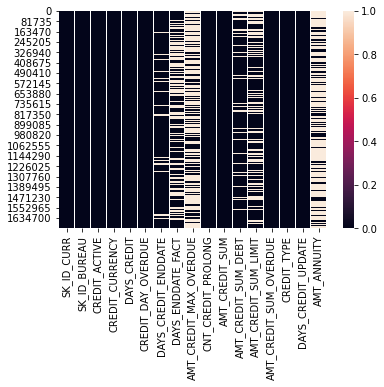

In [5]:
sns.heatmap(dfb.isnull())

In [6]:
# pandas.options.display.float_format = '{:,.2f}'.format

In [7]:
dftr.columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [8]:
dftr.drop(['NAME_TYPE_SUITE','FLAG_PHONE','HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG','BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE','ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE', 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI','ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE','TOTALAREA_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE','AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR'], axis = 1, inplace=True)

In [9]:
dftr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 69 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [10]:
dftr[dftr['CODE_GENDER']=='XNA']
dftr.drop(dftr.index[[35657,38566,83382,189640]],inplace=True)

In [11]:
dftr[dftr['CODE_GENDER']=='XNA']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21


In [12]:
dftr['age']= (dftr['DAYS_BIRTH']/-365).round(0)

<AxesSubplot:>

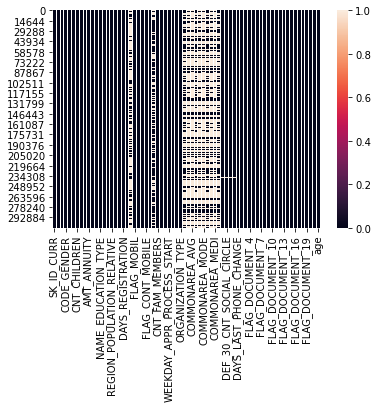

In [13]:
sns.heatmap(dftr.isnull())

In [14]:
dfbb.head(10)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
5,5715448,-5,C
6,5715448,-6,C
7,5715448,-7,C
8,5715448,-8,C
9,5715448,-9,0


In [15]:
defaulted=dftr[dftr['TARGET']==1]


In [16]:
defaulted.to_csv(r'~/Desktop/dfd.csv')

In [17]:
X = dftr[['NAME_HOUSING_TYPE','AMT_CREDIT','NAME_FAMILY_STATUS','OCCUPATION_TYPE','CODE_GENDER','NAME_EDUCATION_TYPE','age','CNT_CHILDREN']]
y = dftr['TARGET']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)


In [18]:
fitted_model = smf.logit(formula='TARGET ~ age +C(OCCUPATION_TYPE)+C(CODE_GENDER)+C(CNT_CHILDREN)', data=dftr).fit()
fitted_model.pred_table()


         Current function value: 0.291528
         Iterations: 35


/Users/assel/miniconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


array([[1.92571e+05, 0.00000e+00],
       [1.85440e+04, 3.00000e+00]])

In [19]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 TARGET   No. Observations:               211118
Model:                          Logit   Df Residuals:                   211084
Method:                           MLE   Df Model:                           33
Date:                Tue, 22 Sep 2020   Pseudo R-squ.:                 0.02020
Time:                        20:47:01   Log-Likelihood:                -61547.
converged:                      False   LL-Null:                       -62816.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                      -1.9758      0.058    -34.027      0.000      -2.090      -1.862
C(OCCUPATION_TYPE)[T.Cleaning staff]            0.8999      0.069     13.059      0.000       0.765       1.035
C(OCCUPATION_TYPE)[T.Cooking staff]             0.8481      0.064     13.349      0.000       0.724       0.973
C(OCCUPATION_TYPE)[T.Core staff]                0.2064      0.053      3.862      0.000       0.102       0.311
C(OCCUPATION_TYPE)[T.Drivers]                   0.8102      0.056     14.595      0.000       0.701       0.919
C(OCCUPATION_TYPE)[T.HR staff]                  0.2593      0.179      1.450      0.147      -0.091       0.610
C(OCCUPATION_TYPE)[T.High skill tech staff]     0.2000      0.062      3.246      0.001       0.079       0.321
C(OCCUPATION_TYPE)[T.IT staff]                  0.0717      0.184      0.389      0.697      -0.290       0.433
C(OCCUPATION_TYPE)[T.Laborers]                  0.7572      0.050     15.016      0.000       0.658       0.856
C(OCCUPATION_TYPE)[T.Low-skill Laborers]        1.2458      0.077     16.260      0.000       1.096       1.396
C(OCCUPATION_TYPE)[T.Managers]                  0.2425      0.056      4.345      0.000       0.133       0.352
C(OCCUPATION_TYPE)[T.Medicine staff]            0.4003      0.064      6.246      0.000       0.275       0.526
C(OCCUPATION_TYPE)[T.Private service staff]     0.2975      0.091      3.253      0.001       0.118       0.477
C(OCCUPATION_TYPE)[T.Realty agents]             0.4627      0.144      3.217      0.001       0.181       0.745
C(OCCUPATION_TYPE)[T.Sales staff]               0.6771      0.051     13.308      0.000       0.577       0.777
C(OCCUPATION_TYPE)[T.Secretaries]               0.3447      0.118      2.917      0.004       0.113       0.576
C(OCCUPATION_TYPE)[T.Security staff]            0.8751      0.063     13.844      0.000       0.751       0.999
C(OCCUPATION_TYPE)[T.Waiters/barmen staff]      0.7795      0.099      7.910      0.000       0.586       0.973
C(CODE_GENDER)[T.M]                             0.1510      0.019      7.838      0.000       0.113       0.189
C(CNT_CHILDREN)[T.1]                           -0.0352      0.019     -1.885      0.059      -0.072       0.001
C(CNT_CHILDREN)[T.2]                           -0.0957      0.026     -3.694      0.000      -0.146      -0.045
C(CNT_CHILDREN)[T.3]                            0.0621      0.062      1.007      0.314      -0.059       0.183
C(CNT_CHILDREN)[T.4]                            0.3567      0.165      2.163      0.031       0.033       0.680
C(CNT_CHILDREN)[T.5]                            0.0082      0.431      0.019      0.985      -0.837       0.853
C(CNT_CHILDREN)[T.6]                            1.6413      0.619      2.650      0.008       0.427       2.855
C(CNT_CHILDREN)[T.7]                          -45.4350   7.81e+09  -5.82e-09      1.000   -1.53e+10    1.

In [20]:
# dftr.to_csv(r'~/Desktop/fortab.csv')

In [21]:
# df = dftr.sample(frac =.25)

In [22]:
# dftr['CODE_GENDER']
# dftr.loc[dftr['CODE_GENDER'] == 'XNA']

In [23]:
# plt.figure(figsize=(6, 5))
# yaxis = dftr['TARGET'].value_counts().values / dftr.shape[0]
# barplot = sns.barplot(x=[0,1], y=yaxis, palette = 'bright')
# for p in barplot.patches:
#     barplot.annotate(format(p.get_height()*100, '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
# plt.title("Overall Percentage of Paid vs Not Paid")
# plt.xlabel('0= Paid Off   1=Not Paid Off')
# plt.ylabel('Percentage')

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = dftr[['NAME_HOUSING_TYPE','AMT_CREDIT','NAME_FAMILY_STATUS','OCCUPATION_TYPE','CODE_GENDER','NAME_EDUCATION_TYPE','age','CNT_CHILDREN','TARGET']]

In [26]:
y = dftr['AMT_INCOME_TOTAL']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [28]:
dftr_train = pd.concat([X_train, y_train], axis = 1)
dftr_train

,NAME_HOUSING_TYPE,AMT_CREDIT,NAME_FAMILY_STATUS,OCCUPATION_TYPE,CODE_GENDER,NAME_EDUCATION_TYPE,age,CNT_CHILDREN,TARGET,AMT_INCOME_TOTAL
256869,House / apartment,1035832.5,Civil marriage,Sales staff,F,Incomplete higher,28.0,0,0,135000.0
52585,House / apartment,640080.0,Married,NaN,F,Secondary / secondary special,45.0,0,0,180000.0
204201,House / apartment,610335.0,Married,Laborers,F,Secondary / secondary special,38.0,2,0,90000.0
71236,House / apartment,239850.0,Separated,Laborers,F,Incomplete higher,49.0,0,0,135000.0
304645,House / apartment,352044.0,Married,Accountants,F,Secondary / secondary special,51.0,0,0,135000.0
...,...,...,...,...,...,...,...,...,...,...
143350,House / apartment,225000.0,Separated,NaN,M,Higher education,47.0,2,0,450000.0
59405,House / apartment,239850.0,Married,Laborers,F,Secondary / secondary special,45.0,0,0,126000.0
129136,House / apartment,472500.0,Separated,NaN,F,Secondary / secondary special,56.0,0,0,85500.0
102506,House / apartment,675000.0,Married,High skill tech staff,F,Secondary / secondary special,46.0,0,0,180000.0


In [29]:
dftr_test = pd.concat([X_test,y_test], axis = 1)
dftr_test

,NAME_HOUSING_TYPE,AMT_CREDIT,NAME_FAMILY_STATUS,OCCUPATION_TYPE,CODE_GENDER,NAME_EDUCATION_TYPE,age,CNT_CHILDREN,TARGET,AMT_INCOME_TOTAL
61657,House / apartment,521280.0,Single / not married,NaN,M,Secondary / secondary special,36.0,0,1,72000.0
194741,House / apartment,337500.0,Married,NaN,F,Higher education,40.0,2,0,112500.0
205780,House / apartment,521280.0,Married,High skill tech staff,M,Secondary / secondary special,42.0,0,0,180000.0
237934,With parents,90000.0,Single / not married,NaN,M,Secondary / secondary special,26.0,0,0,90000.0
30109,House / apartment,900000.0,Married,Accountants,F,Secondary / secondary special,35.0,0,0,270000.0
...,...,...,...,...,...,...,...,...,...,...
63113,House / apartment,1546020.0,Married,NaN,F,Secondary / secondary special,62.0,0,0,112500.0
203265,House / apartment,532345.5,Married,Managers,M,Secondary / secondary special,58.0,0,1,247500.0
9612,With parents,254700.0,Civil marriage,Sales staff,F,Secondary / secondary special,31.0,2,0,81000.0
75124,Rented apartment,355536.0,Married,NaN,F,Secondary / secondary special,61.0,0,0,139500.0


In [30]:
linear_model = smf.ols(formula='AMT_INCOME_TOTAL ~ C(CNT_CHILDREN)', data=dftr_train).fit()



In [31]:
from sklearn.metrics import r2_score

In [32]:
linear_model.params

Intercept                166300.733954
C(CNT_CHILDREN)[T.1]       7518.885125
C(CNT_CHILDREN)[T.2]       6658.674962
C(CNT_CHILDREN)[T.3]       8877.421797
C(CNT_CHILDREN)[T.4]       3407.845927
C(CNT_CHILDREN)[T.5]       5610.012314
C(CNT_CHILDREN)[T.6]     -30175.733954
C(CNT_CHILDREN)[T.7]     -32800.733954
C(CNT_CHILDREN)[T.8]     -58300.733954
C(CNT_CHILDREN)[T.9]      58699.266046
C(CNT_CHILDREN)[T.10]    -98800.733954
C(CNT_CHILDREN)[T.11]    148699.266046
C(CNT_CHILDREN)[T.12]    114949.266046
C(CNT_CHILDREN)[T.14]    -58300.733954
C(CNT_CHILDREN)[T.19]    -53800.733954
dtype: float64

In [33]:
y_test_pred = linear_model.predict(X_test)

In [34]:
y_test_pred

61657     166300.733954
194741    172959.408916
205780    166300.733954
237934    166300.733954
30109     166300.733954
              ...      
63113     166300.733954
203265    166300.733954
9612      172959.408916
75124     166300.733954
210564    166300.733954
Length: 61502, dtype: float64

In [35]:
y_test

61657      72000.0
194741    112500.0
205780    180000.0
237934     90000.0
30109     270000.0
            ...   
63113     112500.0
203265    247500.0
9612       81000.0
75124     139500.0
210564    157500.0
Name: AMT_INCOME_TOTAL, Length: 61502, dtype: float64

In [36]:
# r2_score(y_test, y_test_pred)

<AxesSubplot:xlabel='TARGET'>

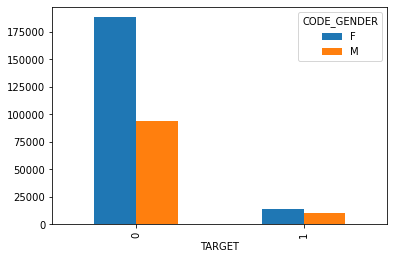

In [37]:
dftr.groupby('CODE_GENDER').TARGET.value_counts().unstack(0).plot.bar()

<AxesSubplot:xlabel='TARGET'>

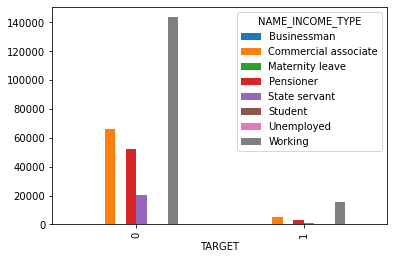

In [38]:
dftr.groupby('NAME_INCOME_TYPE').TARGET.value_counts().unstack(0).plot.bar()

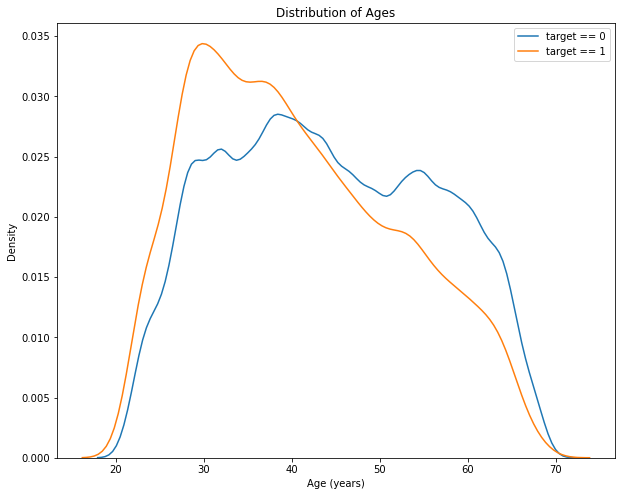

In [39]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(dftr.loc[dftr['TARGET'] == 0, 'age'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(dftr.loc[dftr['TARGET'] == 1, 'age'], label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');


<AxesSubplot:xlabel='NAME_HOUSING_TYPE', ylabel='count'>

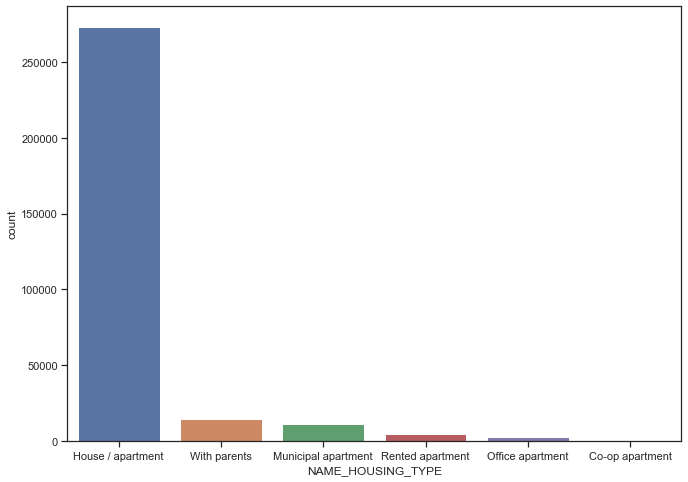

In [40]:
sns.set(rc={'figure.figsize': (11, 8)})
sns.set_style(style="ticks")
sns.countplot(x="NAME_HOUSING_TYPE", data=dftr, order=dftr['NAME_HOUSING_TYPE'].value_counts().sort_values(ascending=False).index)

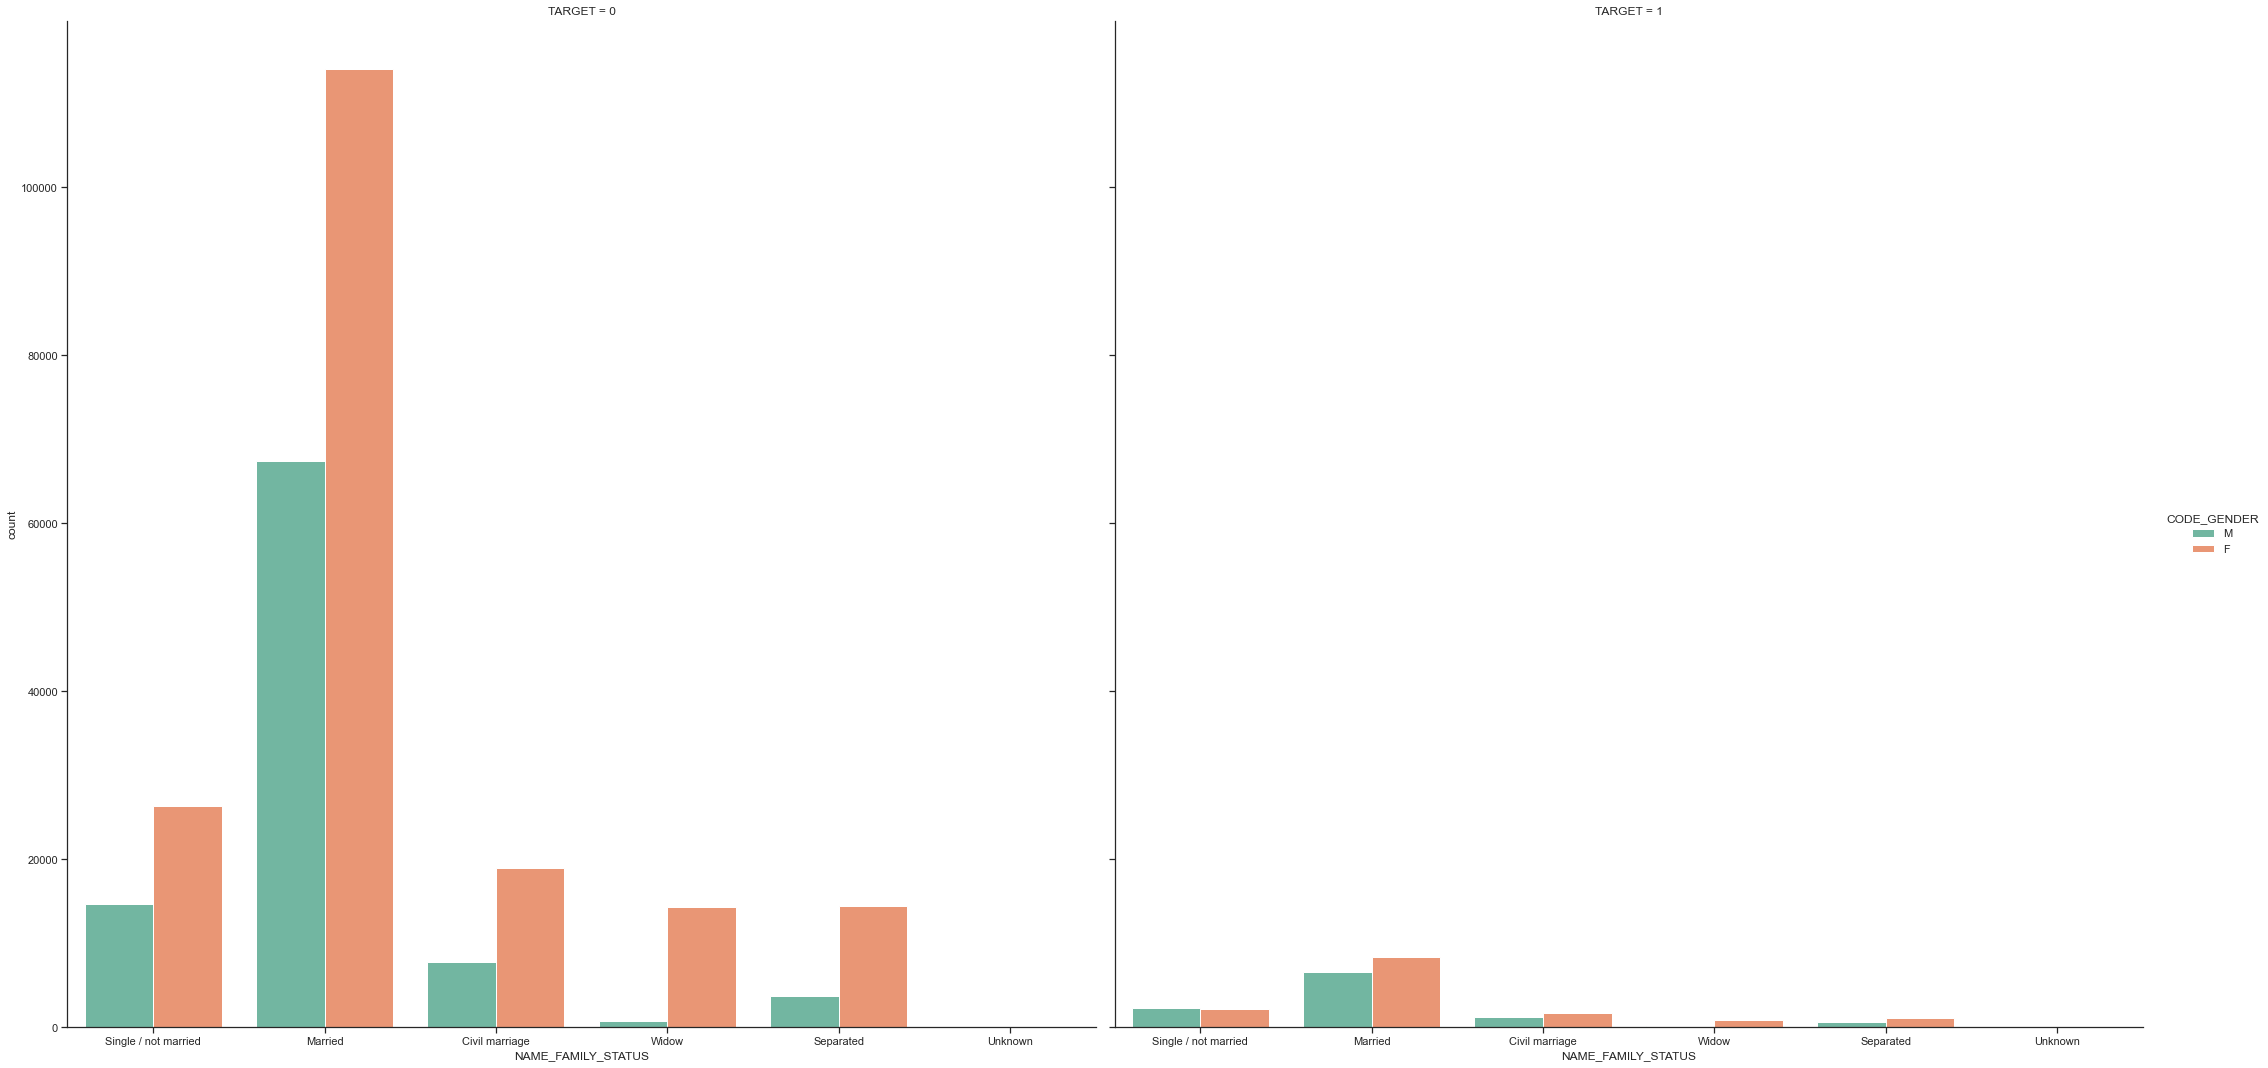

In [41]:
g = sns.catplot(x="NAME_FAMILY_STATUS", hue="CODE_GENDER", col="TARGET",
                data=dftr,palette="Set2",kind="count",
                height=15, aspect=1)

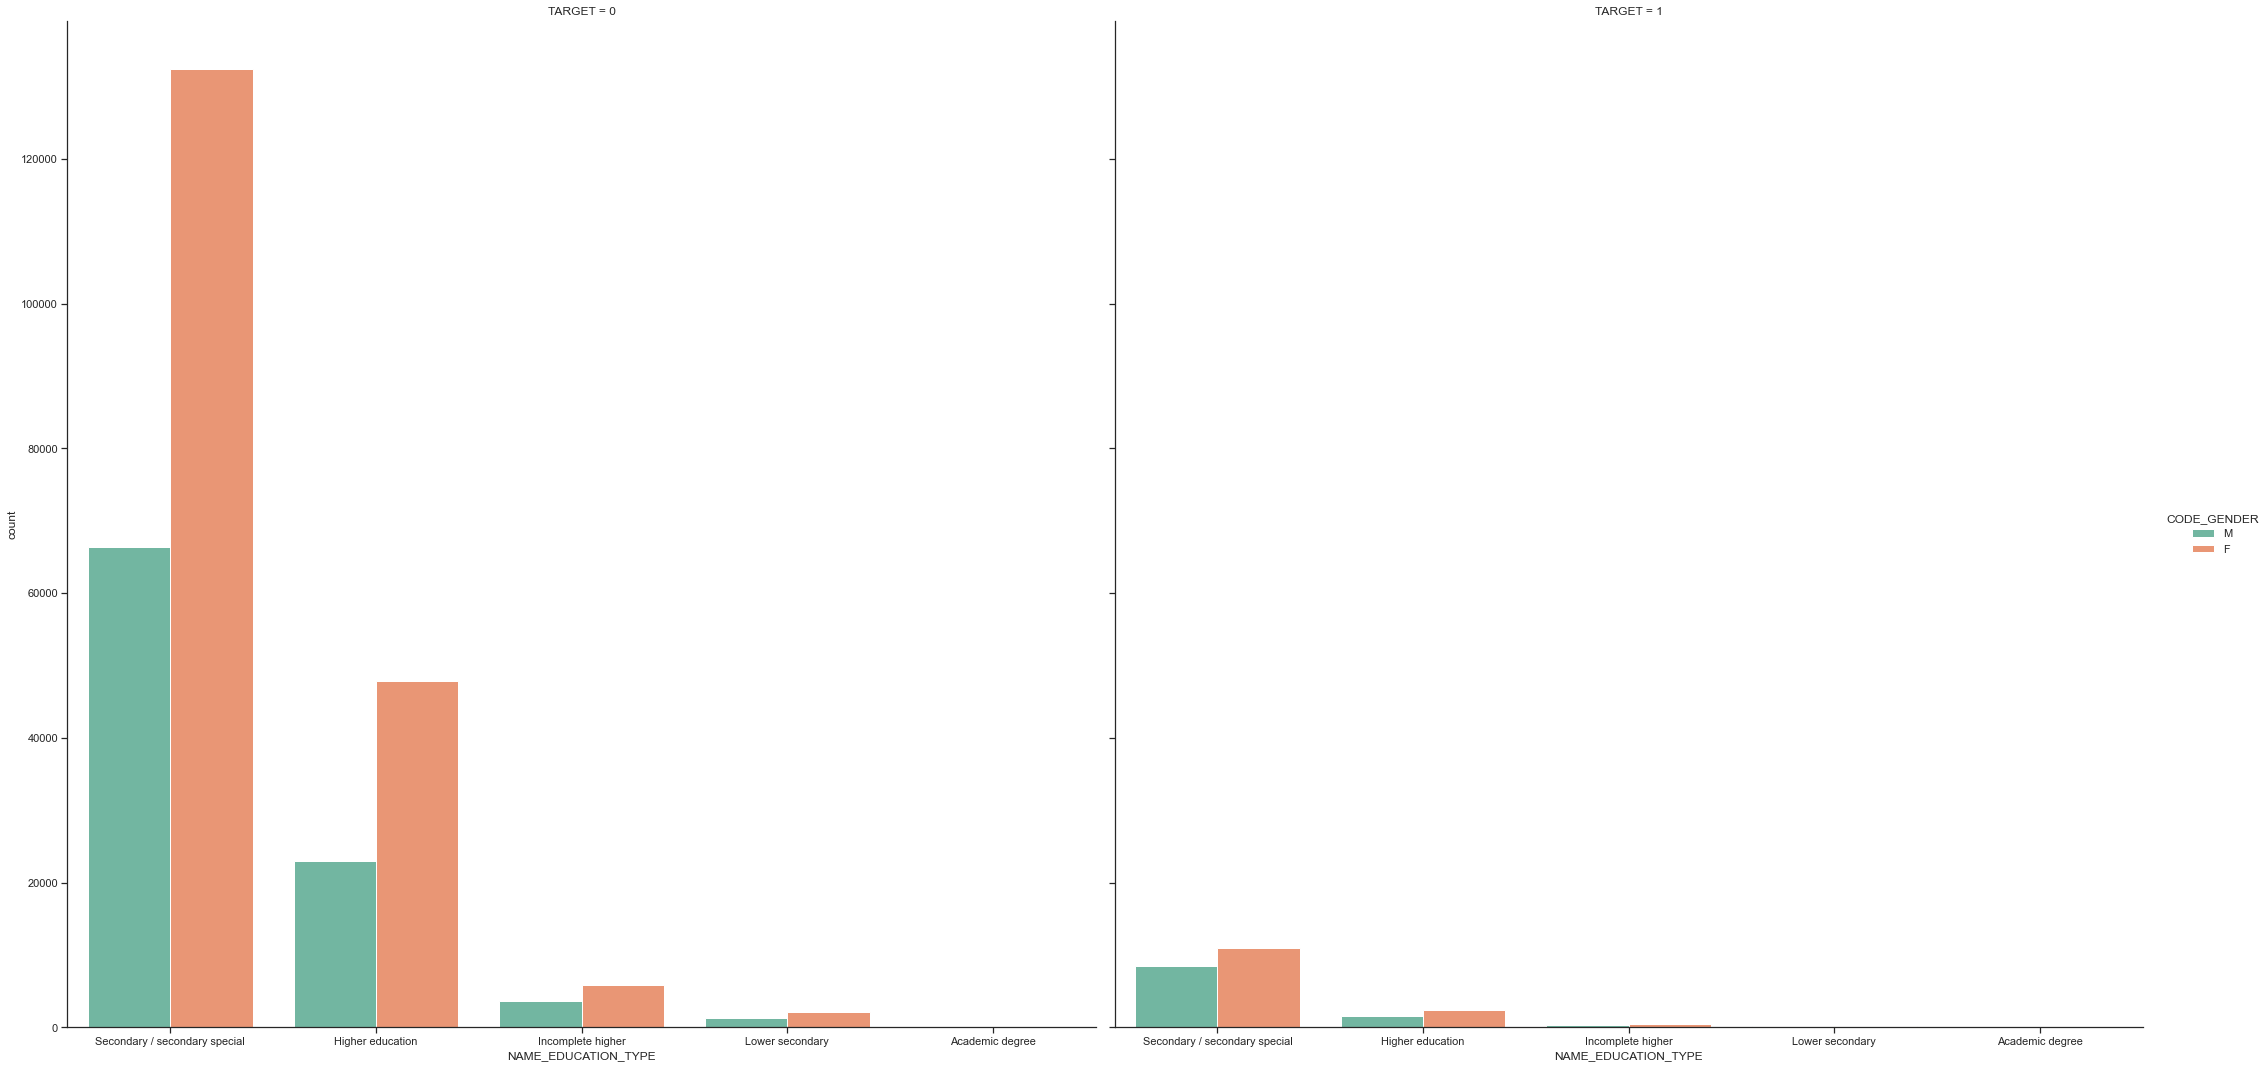

In [42]:
g = sns.catplot(x="NAME_EDUCATION_TYPE", hue="CODE_GENDER", col="TARGET",
                data=dftr,palette="Set2",kind="count",
                height=15, aspect=1)

<AxesSubplot:xlabel='NAME_EDUCATION_TYPE', ylabel='count'>

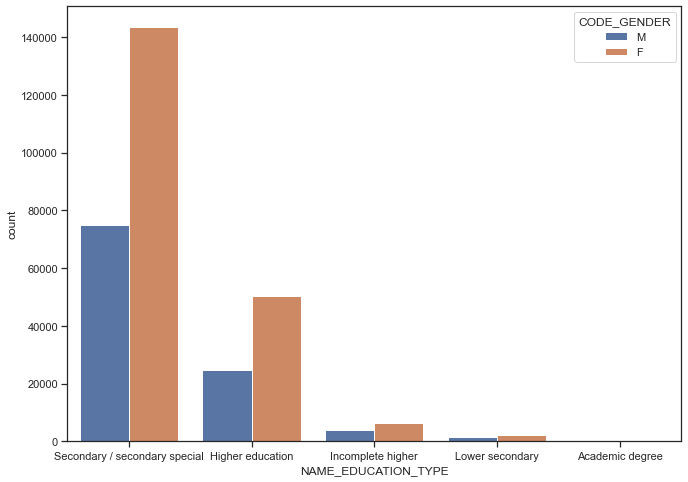

In [43]:
sns.set(rc={'figure.figsize': (11, 8)})
sns.set_style(style="ticks")
sns.countplot(x="NAME_EDUCATION_TYPE",hue="CODE_GENDER", data=dftr, order=dftr['NAME_EDUCATION_TYPE'].value_counts().sort_values(ascending=False).index)

<AxesSubplot:xlabel='TARGET'>

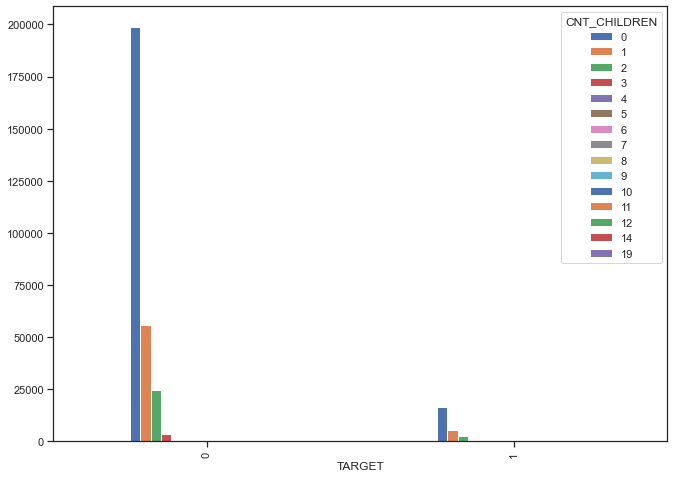

In [44]:
dftr.groupby('CNT_CHILDREN').TARGET.value_counts().unstack(0).plot.bar()

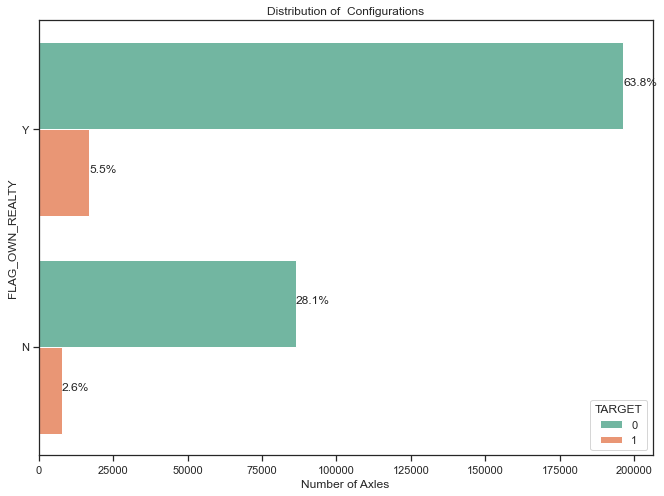

In [45]:
ax=sns.countplot(y="FLAG_OWN_REALTY", hue='TARGET', data=dftr,palette="Set2")
plt.title('Distribution of  Configurations')
plt.xlabel('Number of Axles')

total = len(dftr['FLAG_OWN_REALTY'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

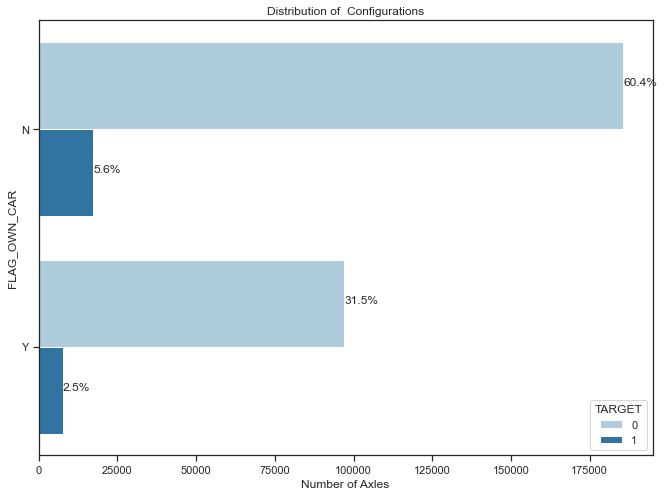

In [46]:
ax=sns.countplot(y="FLAG_OWN_CAR", hue='TARGET', data=dftr,palette="Paired")
plt.title('Distribution of  Configurations')
plt.xlabel('Number of Axles')

total = len(dftr['FLAG_OWN_REALTY'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

In [47]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
Pemail = (dftr[~dftr['ORGANIZATION_TYPE'].isnull()].groupby(['TARGET'])['ORGANIZATION_TYPE'].value_counts(normalize=True)


sns.barplot(x="ORGANIZATION_TYPE", hue="TARGET", data=dftr, palette = 'bright')
plt.xticks(rotation=100)

SyntaxError: invalid syntax (<ipython-input-47-01611f76a69b>, line 6)

In [ ]:
dfb['CREDIT_CURRENCY'].unique()

In [ ]:
dftr[dftr['NAME_INCOME_TYPE']=='Businessman']

In [ ]:
dfa = pd.merge(dftr, dfb, on='SK_ID_CURR', how='left')

In [ ]:
dfa.head(5)

In [ ]:
# dfa.groupby(['CREDIT_CURRENCY']).value_counts()
dfa['CREDIT_CURRENCY'].value_counts(normalize=True)

In [ ]:
sns.heatmap(dfa.isnull())

In [ ]:
dfa.to_csv(r'~/Desktop/dfa.csv')

In [ ]:
df.head(10)